# Estimating Density in One Dimension

<b> Install all the necessary libraries </b>

In [1]:
# solving the problem with basemap/conda
import os
os.environ['PROJ_LIB'] = 'C:/Users/Hevans/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'

In [2]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import scipy.stats
import sklearn.model_selection
import sklearn.neighbors
import mpl_toolkits.basemap
seaborn.set()

<b> Sample 1,000 data points from the standard normal distribution. Add 3.5 to each of the last 625 values of the sample </b>  

In [3]:
rand = np.random.RandomState(100)
vals = rand.randn(1000)
vals[375:] = vals[375:] + 3.5

<b> Plot the 1,000-point sample data as a histogram and add a scatterplot below it </b>

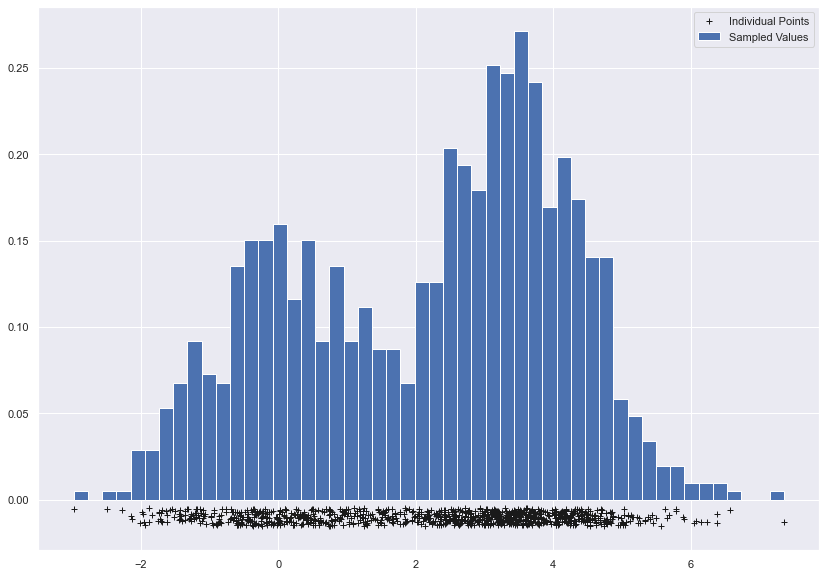

In [4]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.hist(vals, bins=50, density=True, label='Sampled Values')
ax.plot(vals, -0.005 - 0.01 * np.random.random(len(vals)), '+k', label='Individual Points')
ax.legend(loc='upper right')
plt.show()

<b> Define a grid of bandwidth values. Then, define and fit a grid search cross-validation algorithm </b>

In [5]:
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.neighbors.KernelDensity(kernel="gaussian"),
                                            param_grid={"bandwidth": bandwidths},
                                            cv=10)
grid.fit(vals[:, None])

GridSearchCV(cv=10, estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.27825594,  0.29150531,  0.30538555,
        0.319926...
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47707636,
        2.59502421,  2.71858824,  2.84803587,  2.98364724,  3.12571585,
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])})

<b> Extract the optimal bandwidth value </b>

In [6]:
best_bandwidth = grid.best_params_["bandwidth"]
print(f"Best Bandwidth Value: {best_bandwidth}")

Best Bandwidth Value: 0.40370172585965547


<b> Replot the histogram and overlay the estimated density </b>

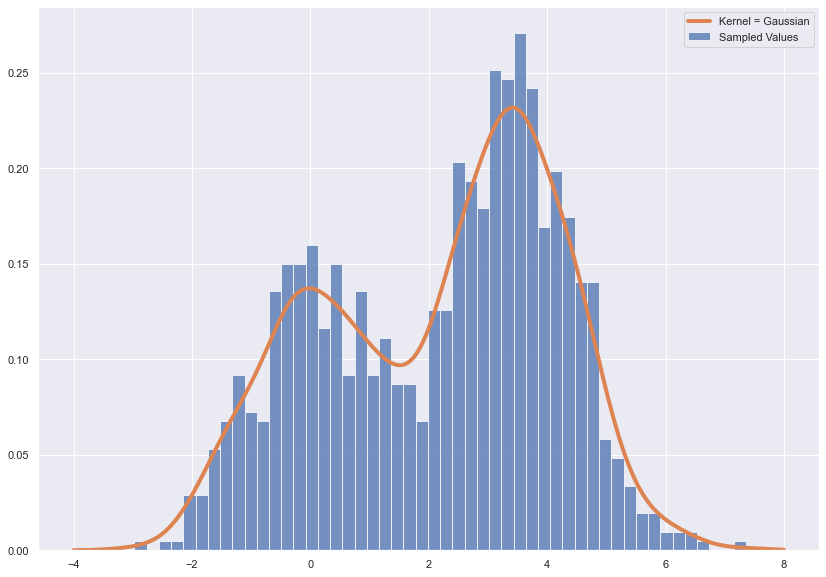

In [7]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.hist(vals, bins=50, density=True, alpha=0.75, label='Sampled Values')
x_vec = np.linspace(-4, 8, 10000)[:, np.newaxis]
log_density = np.exp(grid.best_estimator_.score_samples(x_vec))
ax.plot(x_vec[:, 0], log_density, '-', linewidth=4, label='Kernel = Gaussian')
ax.legend(loc='upper right')
plt.show()

# Analyzing Crime in London

<b> Load the crime data. Use the path where you saved the downloaded directory, create a list of the year-month tags, use the read_csv command to load the individual files iteratively, and then concatenate these files together </b>

In [8]:
path = 'datasets/metro-jul18-dec18/{yr_mon}/{yr_mon}-metropolitan-street.csv'

In [9]:
yearmon_list = ['2018-0' + str(i) if i <= 9 else '2018-' + str(i) for i in range(7, 13)]
print(yearmon_list)

['2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12']


In [10]:
data_yearmon_list = []

# read each year month file individually
for idx, i in enumerate(yearmon_list):
    df = pd.read_csv(path.format(yr_mon=i), header=0)
    data_yearmon_list.append(df)
    if idx == 0:
        print(f"Month: {i}")
        print(f"Dimensions: {df.shape}")
        print(f"Head:\n{df.head(2)}\n")

Month: 2018-07
Dimensions: (95677, 12)
Head:
                                            Crime ID    Month  \
0  e9fe81ec7a6f5d2a80445f04be3d7e92831dbf3090744e...  2018-07   
1  076b796ba1e1ba3f69c9144e2aa7a7bc85b61d51bf7a59...  2018-07   

                   Reported by                 Falls within  Longitude  \
0  Metropolitan Police Service  Metropolitan Police Service   0.774271   
1  Metropolitan Police Service  Metropolitan Police Service  -1.007293   

    Latitude                    Location  LSOA code            LSOA name  \
0  51.148147  On or near Bethersden Road  E01024031         Ashford 012B   
1  51.893136           On or near Prison  E01017674  Aylesbury Vale 010D   

    Crime type      Last outcome category  Context  
0  Other theft  Status update unavailable      NaN  
1  Other crime     Awaiting court outcome      NaN  



In [11]:
# concatenate the list of year month data frames together
london = pd.concat(data_yearmon_list)

<b> Print diagnostics of the complete (six months) and concatenated dataset </b>

In [12]:
print(f"Dimensions - Full Data:\n{london.shape}\n")
print("Unique Months - Full Data:\n{london['Month'].unique()}\n")
print(f"Number of Unique Crime Types - Full Data:\n{london['Crime type'].nunique()}\n")
print(f"Unique Crime Types - Full Data:\n{london['Crime type'].nunique()}\n")
print(f"Count Occurrences Of Each Unique Crime Type - Full Type:\n{london['Crime type'].value_counts()}\n")

Dimensions - Full Data:
(546032, 12)

Unique Months - Full Data:
{london['Month'].unique()}

Number of Unique Crime Types - Full Data:
14

Unique Crime Types - Full Data:
14

Count Occurrences Of Each Unique Crime Type - Full Type:
Violence and sexual offences    117499
Anti-social behaviour           115448
Other theft                      61833
Vehicle crime                    58857
Burglary                         41145
Criminal damage and arson        28436
Public order                     24655
Theft from the person            22670
Shoplifting                      21296
Drugs                            17292
Robbery                          17060
Bicycle theft                    11362
Other crime                       5223
Possession of weapons             3256
Name: Crime type, dtype: int64



<b> Subset the data frame down to four variables (Longitude, Latitude, Month, and Crime type) </b>

In [13]:
london_subset = london[['Month', 'Longitude', 'Latitude', 'Crime type']]
london_subset.head()

,Month,Longitude,Latitude,Crime type
0,2018-07,0.774271,51.148147,Other theft
1,2018-07,-1.007293,51.893136,Other crime
2,2018-07,0.744706,52.038219,Violence and sexual offences
3,2018-07,0.148434,51.595164,Anti-social behaviour
4,2018-07,0.137065,51.583672,Anti-social behaviour


<b> Using the jointplot function from seaborn, fit and visualize three kernel density estimation models for bicycle theft in July, September, and December 2018 </b>

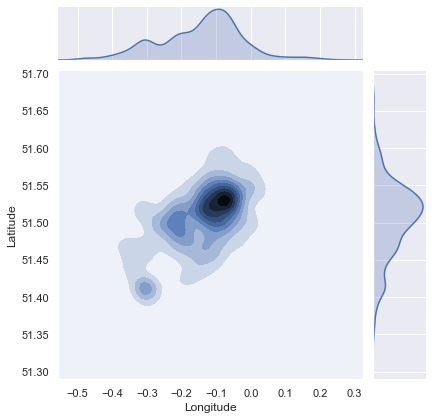

In [14]:
crime_bicycle_jul = london_subset[
    (london_subset["Crime type"] == "Bicycle theft") 
    & (london_subset["Month"] == "2018-07")]

seaborn.jointplot("Longitude", "Latitude", crime_bicycle_jul, kind="kde")
plt.show()

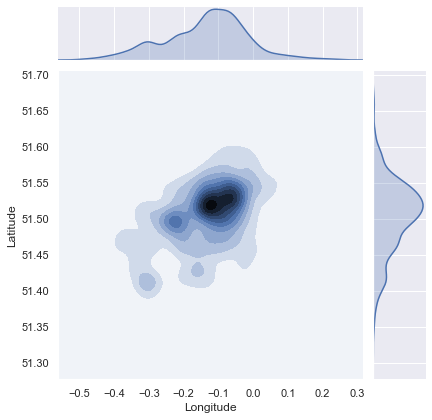

In [15]:
crime_bicycle_sep = london_subset[
    (london_subset["Crime type"] == "Bicycle theft") 
    & (london_subset["Month"] == "2018-09")]

seaborn.jointplot("Longitude", "Latitude", crime_bicycle_sep, kind="kde")
plt.show()

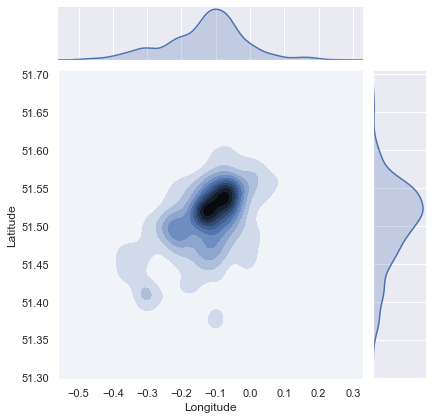

In [16]:
crime_bicycle_dec = london_subset[
    (london_subset["Crime type"] == "Bicycle theft") 
    & (london_subset["Month"] == "2018-12")]

seaborn.jointplot("Longitude", "Latitude", crime_bicycle_dec, kind="kde")
plt.show()

<b> Repeat the last step; this time, use shoplifting crimes for the months of August, October, and November 2018 </b>

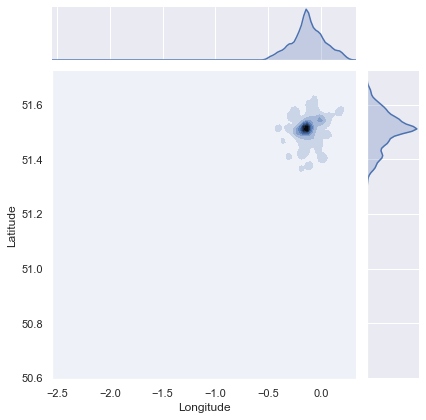

In [17]:
crime_shoplifting_aug = london_subset[
    (london_subset["Crime type"] == "Shoplifting") 
    & (london_subset["Month"] == "2018-08")]

seaborn.jointplot("Longitude", "Latitude", crime_shoplifting_aug, kind="kde")
plt.show()

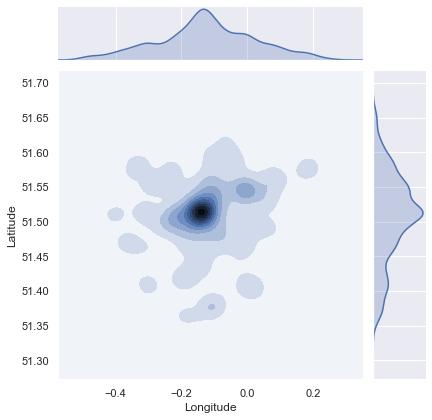

In [18]:
crime_shoplifting_oct = london_subset[
    (london_subset["Crime type"] == "Shoplifting") 
    & (london_subset["Month"] == "2018-10")]

seaborn.jointplot("Longitude", "Latitude", crime_shoplifting_oct, kind="kde")
plt.show()

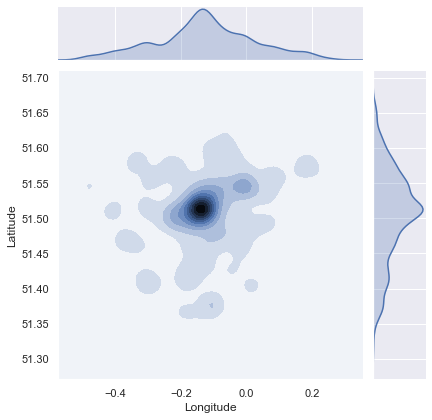

In [19]:
crime_shoplifting_nov = london_subset[
    (london_subset["Crime type"] == "Shoplifting") 
    & (london_subset["Month"] == "2018-11")]

seaborn.jointplot("Longitude", "Latitude", crime_shoplifting_nov, kind="kde")
plt.show()

Like the bicycle theft results, the shoplifting densities are quite stable across the months. The density from August 2018 looks different from the other two months; however, if you look at the longitude and latitude values, you will notice that the density is very similar – just shifted and scaled. The reason for this is that there were probably a number of outliers forcing the creation of a much larger plotting region.

<b> Repeat the last step; this time, use burglary crimes for the months of July, October, and December 2018 </b>

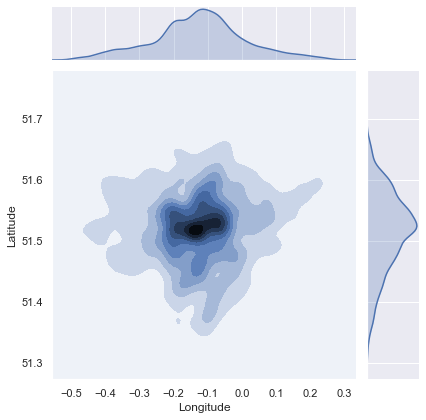

In [20]:
crime_burglary_jul = london_subset[
    (london_subset["Crime type"] == "Burglary") 
    & (london_subset["Month"] == "2018-07")]

seaborn.jointplot("Longitude", "Latitude", crime_burglary_jul, kind="kde")
plt.show()

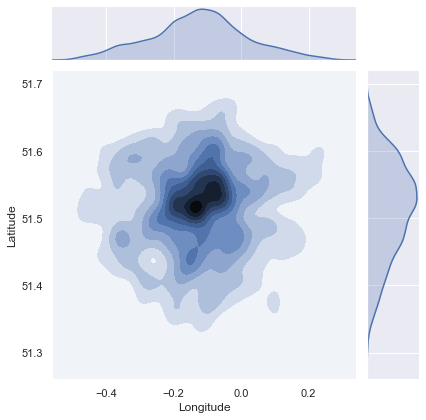

In [21]:
crime_burglary_oct = london_subset[
    (london_subset["Crime type"] == "Burglary") 
    & (london_subset["Month"] == "2018-10")]

seaborn.jointplot("Longitude", "Latitude", crime_burglary_oct, kind="kde")
plt.show()

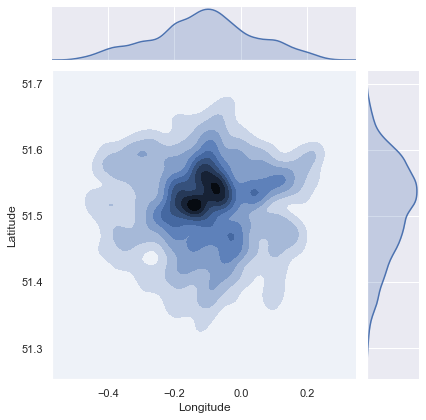

In [22]:
crime_burglary_dec = london_subset[
    (london_subset["Crime type"] == "Burglary") 
    & (london_subset["Month"] == "2018-12")]

seaborn.jointplot("Longitude", "Latitude", crime_burglary_dec, kind="kde")
plt.show()